In [2]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('../datasets/loan.csv')

In [4]:
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [5]:
X=df[['income','credit_score']]

In [6]:
X=np.array(X)

In [7]:
Y=df['loan_status']

In [8]:
Y=np.array(Y)

In [9]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

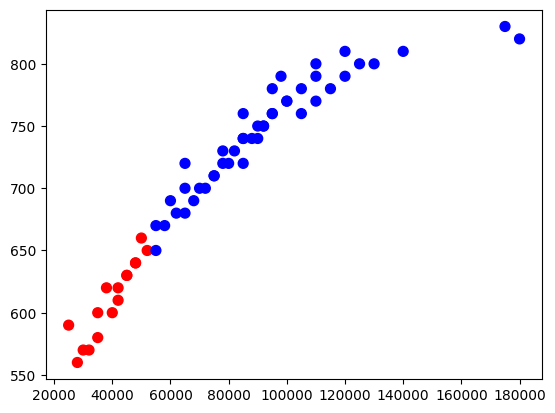

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y_encoded,s=50,cmap='bwr')

In [11]:
xtr,xte,ytr,yte=train_test_split(X,Y_encoded,test_size=0.2,random_state=42)

In [12]:
model=SVC(kernel='linear')
model.fit(xtr,ytr.ravel())


SVC(kernel='linear')

In [13]:
yp=model.predict(xte)

In [14]:
accuracy_score(yte,yp)

1.0

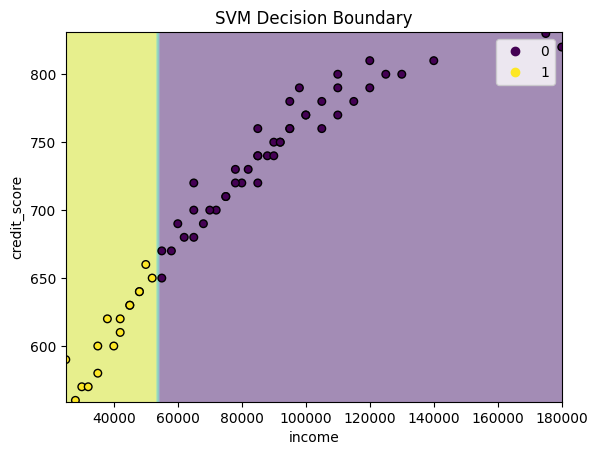

In [15]:
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    xlabel="income",
    ylabel="credit_score",
    alpha=0.5
)


scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_encoded, s=30, edgecolor='k')
plt.legend(handles=scatter.legend_elements()[0], labels=set(Y_encoded))
plt.title('SVM Decision Boundary')
plt.show()

In [16]:

df=pd.read_csv('../datasets/Obesity Classification.csv')


In [17]:

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Label'] = label_encoder.fit_transform(df['Label'])


In [18]:
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1
...,...,...,...,...,...,...,...
103,106,11,1,175,10,3.9,3
104,107,16,0,160,10,3.9,3
105,108,21,1,180,15,5.6,3
106,109,26,0,150,15,5.6,3


In [19]:
X = df[['Age', 'BMI']]
y = df['Label']


In [20]:
# Train the SVM model
svm_model = SVC(kernel='rbf',C=3.0)
svm_model.fit(X, y)


SVC(C=3.0)

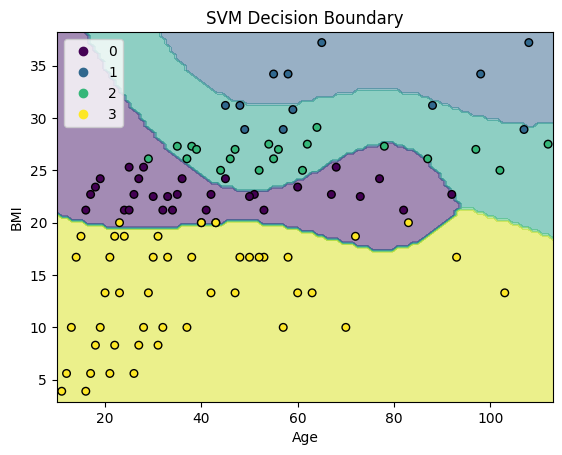

In [21]:
disp = DecisionBoundaryDisplay.from_estimator(
    svm_model,
    X,
    response_method="predict",
    xlabel="Age",
    ylabel="BMI",
    alpha=0.5
)
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, edgecolor='k')
plt.legend(handles=scatter.legend_elements()[0], labels=set(y))
plt.title('SVM Decision Boundary')
plt.show()